In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
#Read the data
data1= pd.read_csv("PCOS_infertility.csv")
data2=pd.read_csv("PCOS_data_without_infertility.csv")

In [5]:
data1

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [6]:
data2

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.3,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,#NAME?,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,#NAME?,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,#NAME?,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,#NAME?,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(data1.head)


<bound method NDFrame.head of      Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0         1             10001           0                    1.99   
1         2             10002           0                   60.80   
2         3             10003           1                  494.08   
3         4             10004           0                    1.99   
4         5             10005           0                  801.45   
..      ...               ...         ...                     ...   
536     537             10537           0                    1.99   
537     538             10538           0                   80.13   
538     539             10539           0                    1.99   
539     540             10540           0                  292.92   
540     541             10541           1                    1.99   

     II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                      1.99       2.07  
1                      1.99       1.53  
2                 

In [8]:
print(data2.head)

<bound method NDFrame.head of      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0       1.0               1.0         0.0        28.0         44.6   
1       2.0               2.0         0.0        36.0         65.0   
2       3.0               3.0         1.0        33.0         68.8   
3       4.0               4.0         0.0        37.0         65.0   
4       5.0               5.0         0.0        25.0         52.0   
..      ...               ...         ...         ...          ...   
994     NaN               NaN         NaN         NaN          NaN   
995     NaN               NaN         NaN         NaN          NaN   
996     NaN               NaN         NaN         NaN          NaN   
997     NaN               NaN         NaN         NaN          NaN   
998     NaN               NaN         NaN         NaN          NaN   

     Height(Cm)      BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0          152.0    19.3         15.0              7

In [9]:
print(data1.tail)

<bound method NDFrame.tail of      Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0         1             10001           0                    1.99   
1         2             10002           0                   60.80   
2         3             10003           1                  494.08   
3         4             10004           0                    1.99   
4         5             10005           0                  801.45   
..      ...               ...         ...                     ...   
536     537             10537           0                    1.99   
537     538             10538           0                   80.13   
538     539             10539           0                    1.99   
539     540             10540           0                  292.92   
540     541             10541           1                    1.99   

     II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                      1.99       2.07  
1                      1.99       1.53  
2                 

In [10]:
print(data2.tail)

<bound method NDFrame.tail of      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0       1.0               1.0         0.0        28.0         44.6   
1       2.0               2.0         0.0        36.0         65.0   
2       3.0               3.0         1.0        33.0         68.8   
3       4.0               4.0         0.0        37.0         65.0   
4       5.0               5.0         0.0        25.0         52.0   
..      ...               ...         ...         ...          ...   
994     NaN               NaN         NaN         NaN          NaN   
995     NaN               NaN         NaN         NaN          NaN   
996     NaN               NaN         NaN         NaN          NaN   
997     NaN               NaN         NaN         NaN          NaN   
998     NaN               NaN         NaN         NaN          NaN   

     Height(Cm)      BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0          152.0    19.3         15.0              7

In [11]:
# Merge the two dataframes based on the patient file number
merged_data = pd.merge(data1, data2, on="Patient File No.")
merged_data

,Sl. No_x,Patient File No.,PCOS (Y/N)_x,I beta-HCG(mIU/mL)_x,II beta-HCG(mIU/mL)_x,AMH(ng/mL)_x,Sl. No_y,PCOS (Y/N)_y,Age (yrs),Weight (Kg),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44


In [12]:
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 n

In [13]:
# Having a look at some basic statistical details.

data1.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


In [14]:
data2.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,13.802218,73.247689,19.243993,11.160037,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,1.840812,4.430285,1.688629,0.866904,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [15]:
data1.shape

(541, 6)

In [16]:
data2.shape

(999, 45)

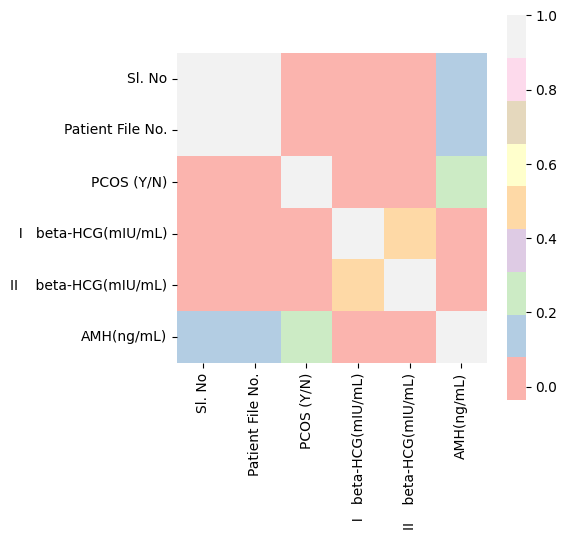

In [17]:
#Convert non-numeric columns to numeric, replacing non-convertible values with NaN
data1_numeric = data1.apply(pd.to_numeric, errors='coerce')
# Drop rows with NaN values
data1_numeric = data1_numeric.dropna()
# Compute the correlation matrix
corrmat = data1_numeric.corr()
# Set the size of the plot
plt.figure(figsize=(5,5))
# Plot the heatmap
sns.heatmap(corrmat, cmap="Pastel1", square=True)
# Show the plot
plt.show()

In [18]:
# Sort the correlation of "PCOS (Y/N)" with other features
pcos_correlation = corrmat["PCOS (Y/N)"].sort_values(ascending=False)

print(pcos_correlation)

PCOS (Y/N)                1.000000
AMH(ng/mL)                0.263863
Patient File No.          0.061318
Sl. No                    0.061318
II    beta-HCG(mIU/mL)    0.012573
  I   beta-HCG(mIU/mL)   -0.027870
Name: PCOS (Y/N), dtype: float64


In [19]:
#features bearing significant correlation

plt.figure(figsize=(12,12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

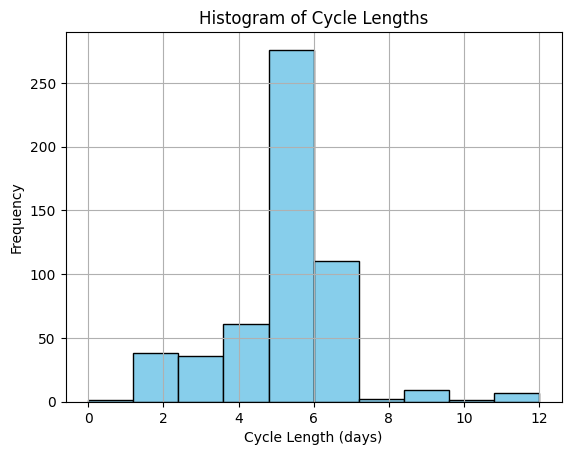

In [20]:
# Read the data
data2 = pd.read_csv("PCOS_data_without_infertility.csv")

# Filter out the 'Cycle length(days)' column
cycle_lengths = data2['Cycle length(days)']

# Plotting a histogram of cycle lengths
plt.hist(cycle_lengths, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Cycle Length (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Cycle Lengths')
plt.grid(True)
plt.show()


In [21]:
print(data1.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')


In [22]:
print(data2.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


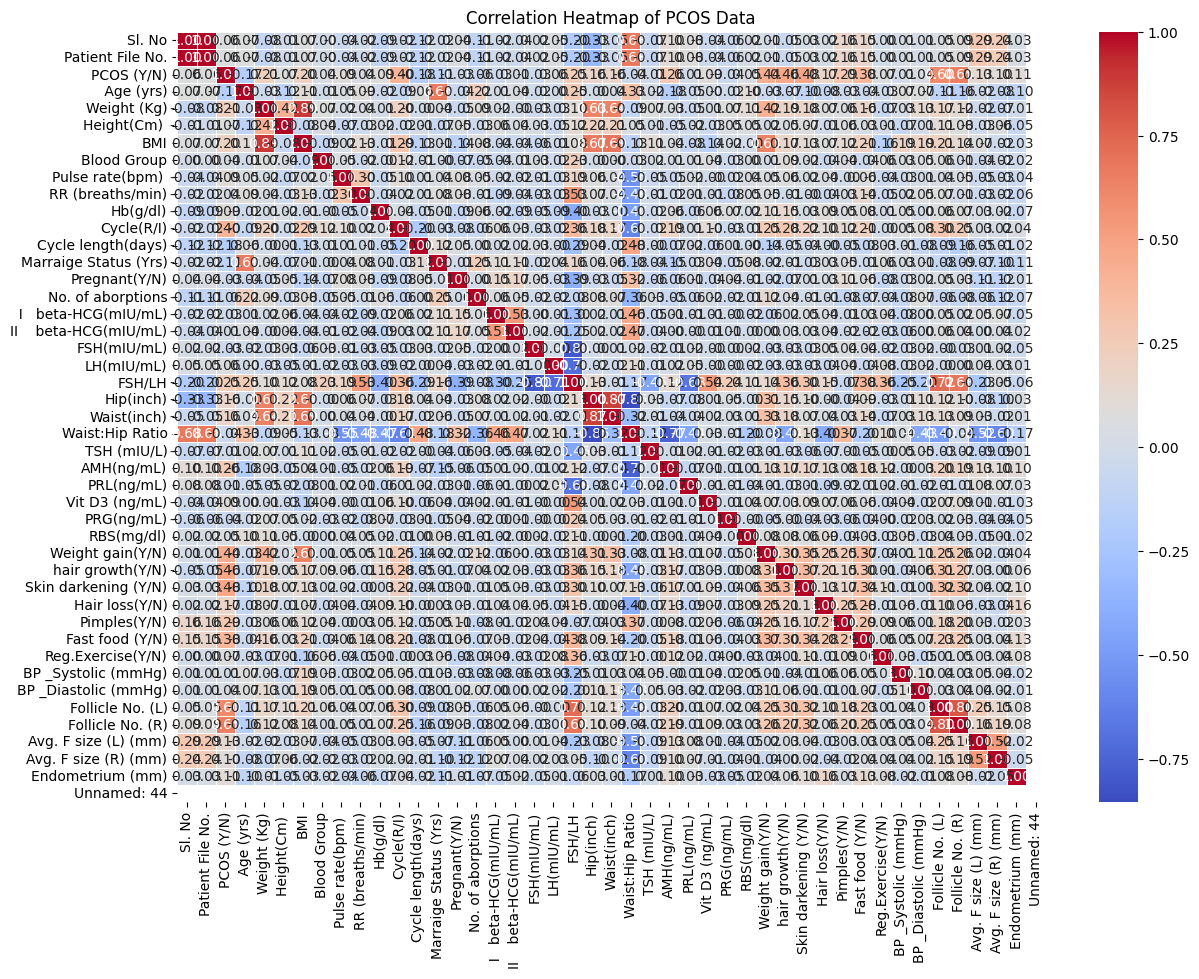

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
data2 = pd.read_csv("PCOS_data_without_infertility.csv")

# Replace non-numeric values with NaN
data2.replace('#NAME?', np.nan, inplace=True)

# Convert columns to numeric
data2 = data2.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = data2.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of PCOS Data')
plt.show()




In [24]:
# Print the column names of your DataFrame
print(merged_data.columns)


Index(['Sl. No_x', 'Patient File No.', 'PCOS (Y/N)_x',
       '  I   beta-HCG(mIU/mL)_x', 'II    beta-HCG(mIU/mL)_x', 'AMH(ng/mL)_x',
       'Sl. No_y', 'PCOS (Y/N)_y', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ',
       'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)',
       'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)_y', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unn

Patterns Of Length Of The Menstrual Cycle

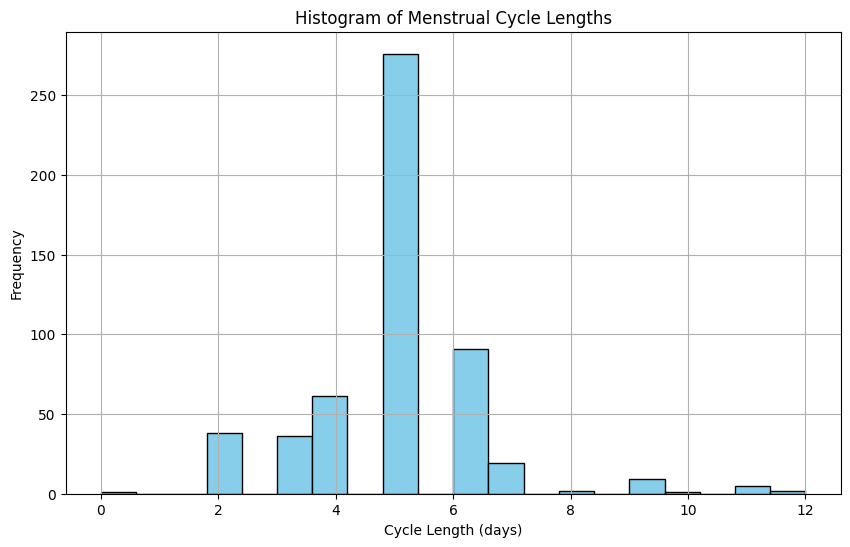

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data2 = pd.read_csv("PCOS_data_without_infertility.csv")

# Filter out the 'Cycle length(days)' column
cycle_lengths = data2['Cycle length(days)'].dropna()  # Drop NaN values

# Plotting a histogram of cycle lengths
plt.figure(figsize=(10, 6))
plt.hist(cycle_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Cycle Length (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Menstrual Cycle Lengths')
plt.grid(True)
plt.show()


<ipython-input-26-f4fdc311c7eb>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cycle_lengths, shade=True)


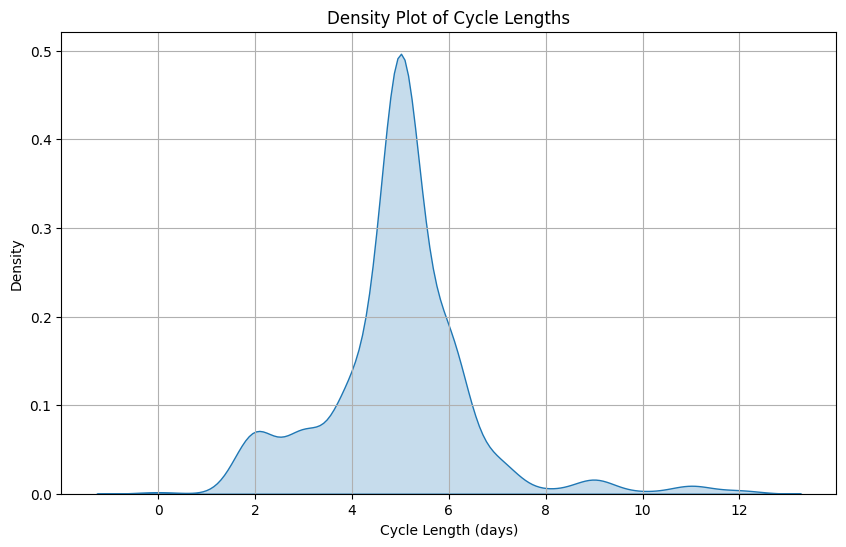

In [26]:

# Plot a density plot of cycle lengths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
data2 = pd.read_csv("PCOS_data_without_infertility.csv")

# Filter out the 'Cycle length(days)' column and drop NaN values
cycle_lengths = data2['Cycle length(days)'].dropna()

# Plotting a density plot of cycle lengths
plt.figure(figsize=(10, 6))
sns.kdeplot(cycle_lengths, shade=True)
plt.xlabel('Cycle Length (days)')
plt.ylabel('Density')
plt.title('Density Plot of Cycle Lengths')
plt.grid(True)
plt.show()



Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')


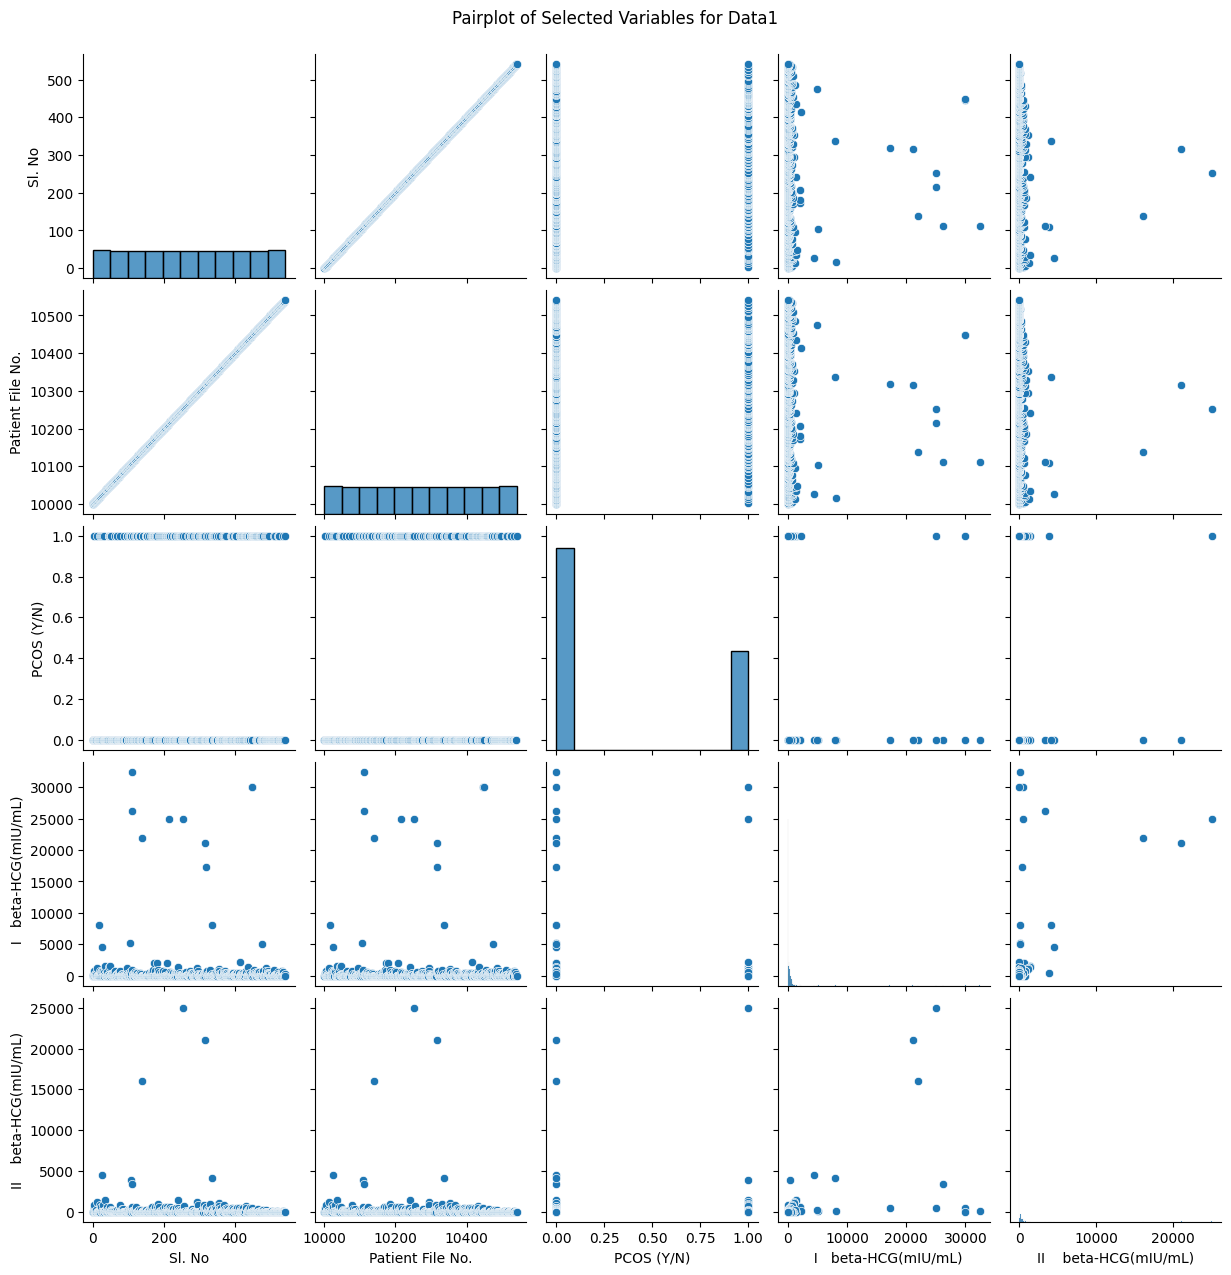

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
data1 = pd.read_csv("PCOS_infertility.csv")

# Drop NaN values
data1_cleaned = data1.dropna()

# Check the column names to ensure correctness
print(data1_cleaned.columns)

# Selecting a subset of columns for the pairplot
columns_subset = [
    'Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
    'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'
]

# Creating the pairplot
sns.pairplot(data1_cleaned[columns_subset])
plt.suptitle('Pairplot of Selected Variables for Data1', y=1.02)
plt.show()


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')


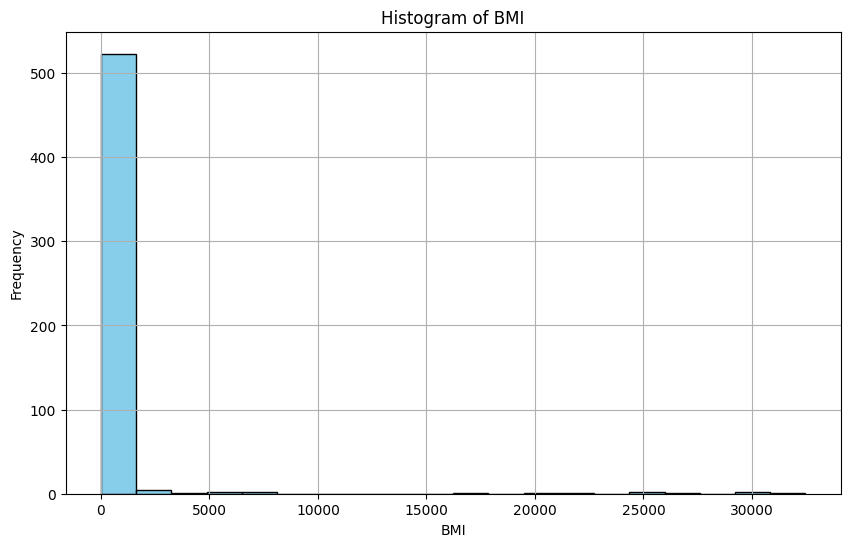

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data1 = pd.read_csv("PCOS_infertility.csv")

# Check the column names to ensure correctness
print(data1.columns)

# Plotting a histogram of BMI
plt.figure(figsize=(10, 6))
plt.hist(data1['  I   beta-HCG(mIU/mL)'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.grid(True)
plt.show()


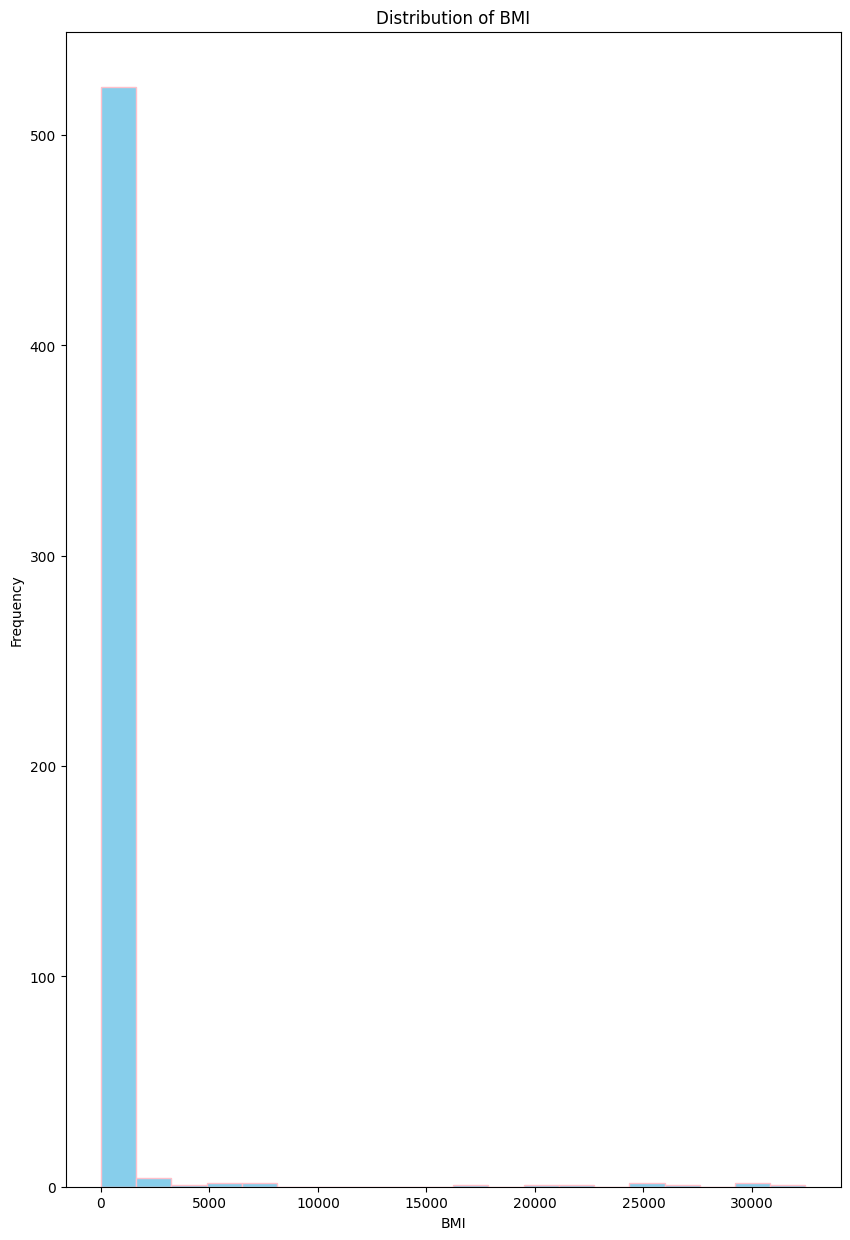

In [29]:
# Drop rows with missing values in the '  I   beta-HCG(mIU/mL)' column
data1_filtered = data1.dropna(subset=['  I   beta-HCG(mIU/mL)'])

# Plot a histogram of '  I   beta-HCG(mIU/mL)'
plt.figure(figsize=(10, 15))
plt.hist(data1_filtered['  I   beta-HCG(mIU/mL)'], bins=20, color='skyblue', edgecolor='pink')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()


Patterns Of Irregularity In Mensuration

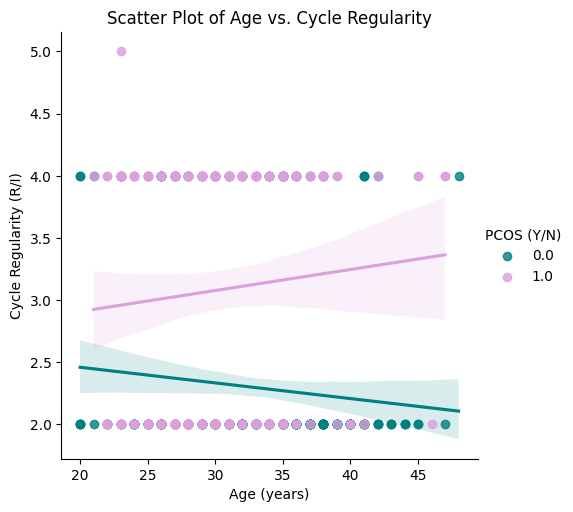

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
color = ["teal", "plum"]

# Create the scatter plot using data from data2
sns.lmplot(data=data2, x=" Age (yrs)", y="Cycle(R/I)", hue="PCOS (Y/N)", palette=color)
plt.xlabel('Age (years)')
plt.ylabel('Cycle Regularity (R/I)')
plt.title('Scatter Plot of Age vs. Cycle Regularity')
plt.show()


Number Of Follicles

# Distribution of follicles in both ovaries.

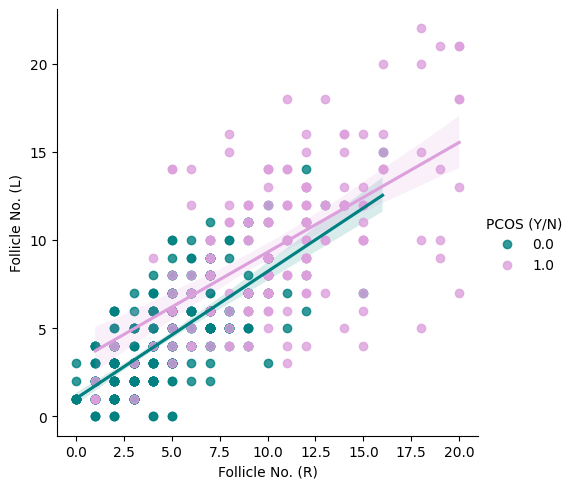

In [31]:
sns.lmplot(data =data2,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

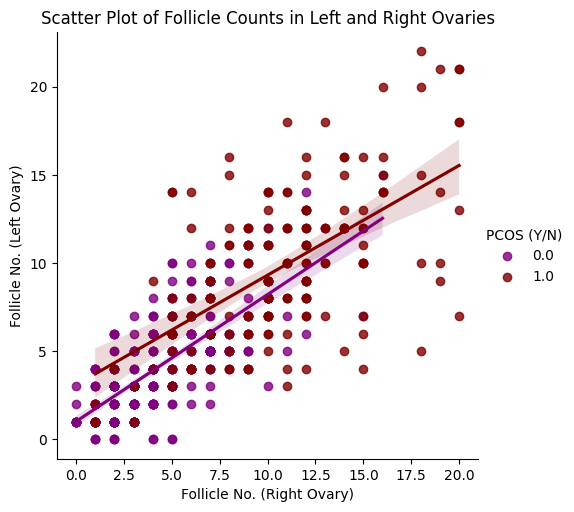

<ipython-input-32-cbf4ca00fb55>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data2["PCOS (Y/N)"], y=data2[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


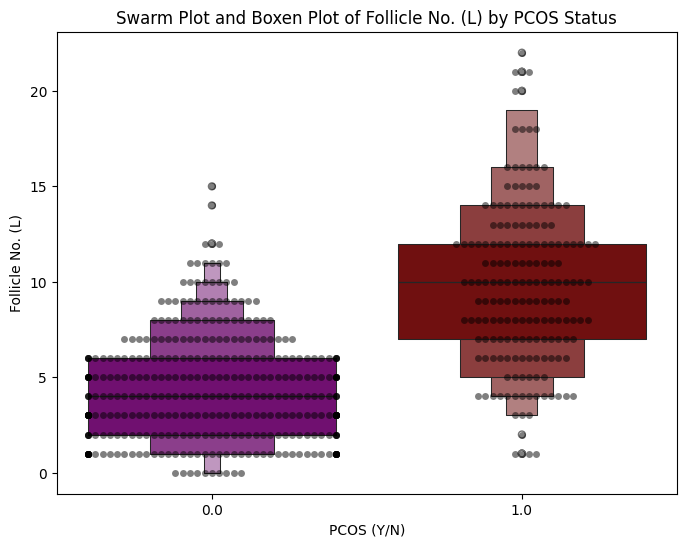

<ipython-input-32-cbf4ca00fb55>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data2["PCOS (Y/N)"], y=data2[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


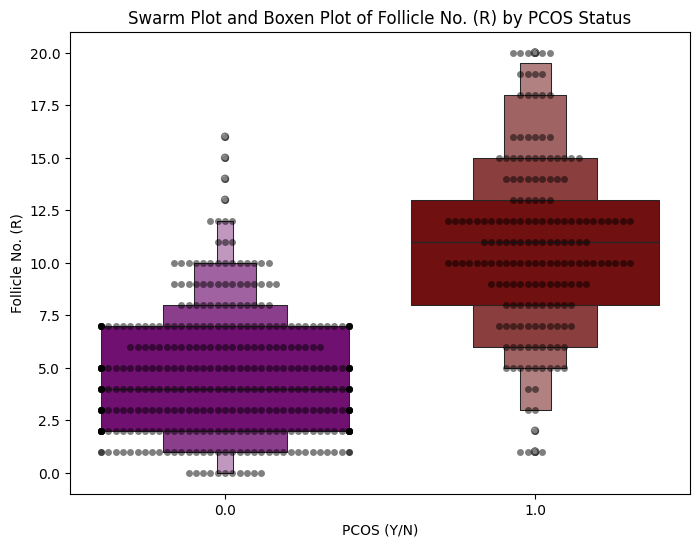

In [32]:
color = ["purple", "maroon"]

# Scatter plot for follicle counts in both ovaries, colored by PCOS status
sns.lmplot(data=data2, x='Follicle No. (R)', y='Follicle No. (L)', hue='PCOS (Y/N)', palette=color)
plt.xlabel('Follicle No. (Right Ovary)')
plt.ylabel('Follicle No. (Left Ovary)')
plt.title('Scatter Plot of Follicle Counts in Left and Right Ovaries')
plt.show()

# Features for further analysis
features = ["Follicle No. (L)", "Follicle No. (R)"]

# Swarm plot and boxen plot for follicle counts, separated by PCOS status
for i in features:
    plt.figure(figsize=(8, 6))

    # Swarm plot
    sns.swarmplot(x=data2["PCOS (Y/N)"], y=data2[i], color="black", alpha=0.5)

    # Boxen plot
    sns.boxenplot(x=data2["PCOS (Y/N)"], y=data2[i], palette=color)

    plt.xlabel('PCOS (Y/N)')
    plt.ylabel(i)
    plt.title(f'Swarm Plot and Boxen Plot of {i} by PCOS Status')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-33-9c77c26a88bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data1["PCOS (Y/N)"], y=data1[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categ

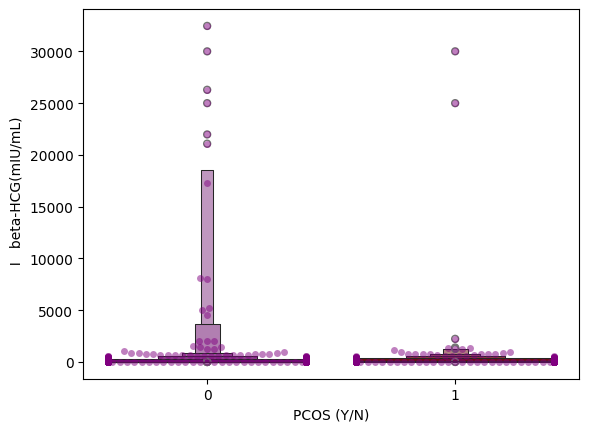

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-33-9c77c26a88bb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data1["PCOS (Y/N)"], y=data1[i], palette=color)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categ

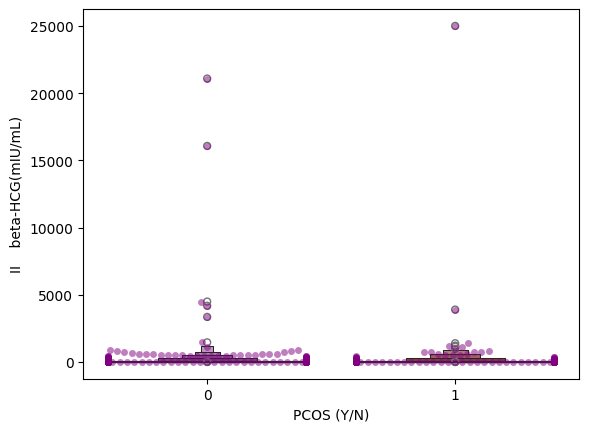

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.0% of the points cannot be plac

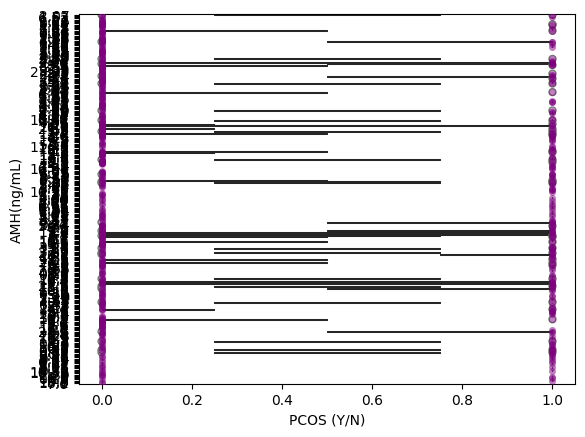

In [33]:
# Define the features to visualize
features = ["  I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "AMH(ng/mL)"]

# Visualize the data
for i in features:
    sns.swarmplot(x=data1["PCOS (Y/N)"], y=data1[i], color="purple", alpha=0.5)
    sns.boxenplot(x=data1["PCOS (Y/N)"], y=data1[i], palette=color)
    plt.show()

In [34]:
# Assuming you have already imported the necessary libraries

# Read the data
data1 = pd.read_csv("PCOS_infertility.csv")

# Define features and target variable
features = ["I beta-HCG(mIU/mL)", "II beta-HCG(mIU/mL)", "AMH(ng/mL)"]
target = "PCOS (Y/N)"

# Split the data into features (X) and target variable (y)
X = data1.drop(["PCOS (Y/N)", "Sl. No", "Patient File No."], axis=1)
y = data1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Now X_train, X_test, y_train, and y_test are ready for further processing

In [35]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train_encoded, y_train)


RandomForestClassifier()

Confusion Matrix

Accuracy: 0.6871165644171779
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       110
           1       0.53      0.34      0.41        53

    accuracy                           0.69       163
   macro avg       0.63      0.60      0.60       163
weighted avg       0.66      0.69      0.67       163



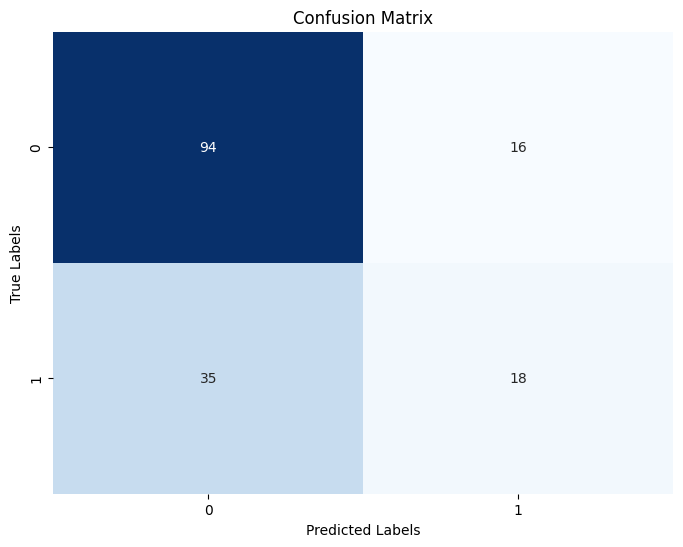

In [41]:
# Assuming 'data1' is your DataFrame
# Identify non-numeric columns
non_numeric_columns = data1.select_dtypes(exclude=['number']).columns

# One-hot encode categorical variables
data1_encoded = pd.get_dummies(data1, columns=non_numeric_columns)

X = data1_encoded.drop('PCOS (Y/N)', axis=1)
y = data1_encoded['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)


#Classification Report & Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()




In [42]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Assuming 'data1' is your DataFrame containing the features and target variable
# Define features and target variable
X = data1.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis=1)  # Features
y = data1['PCOS (Y/N)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base learner (Decision Tree classifier)
base_learner = DecisionTreeClassifier(random_state=42)

# Bagging
bagging_model = BaggingClassifier(base_estimator=base_learner, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", bagging_accuracy)

# Boosting
boosting_model = AdaBoostClassifier(base_estimator=base_learner, n_estimators=10, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
print("Boosting Accuracy:", boosting_accuracy)

# Stacking
stacking_model = StackingClassifier(
    estimators=[('bagging', bagging_model), ('boosting', boosting_model)],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", stacking_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ValueError: could not convert string to float: 'a'

In [44]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'data1' is your DataFrame containing the features and target variable
# Handle non-numeric values
data1_numeric = data1.apply(LabelEncoder().fit_transform)

# Define features and target variable
X = data1_numeric.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis=1)  # Features
y = data1_numeric['PCOS (Y/N)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base learner (Decision Tree classifier)
base_learner = DecisionTreeClassifier(random_state=42)

# Bagging
bagging_model = BaggingClassifier(estimator=base_learner, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", bagging_accuracy)

# Boosting
boosting_model = AdaBoostClassifier(estimator=base_learner, n_estimators=10, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
print("Boosting Accuracy:", boosting_accuracy)

# Stacking
stacking_model = StackingClassifier(
    estimators=[('bagging', bagging_model), ('boosting', boosting_model)],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", stacking_accuracy)


Bagging Accuracy: 0.5644171779141104
Boosting Accuracy: 0.6073619631901841
Stacking Accuracy: 0.6196319018404908
